## 十四款常规机器学习建模

参考案例一：[module-sklearn.ensemble](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

参考案例二：[ensemble-plot-feature-transformation](http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py)


练习步骤为：

- 1、随机准备数据make_classification
- 2、两套模型的训练与基本信息准备
- 3、观察14套模型的准确率与召回率
- 4、刻画14套模型的calibration plots校准曲线
- 5、14套模型的重要性输出
- 6、14套模型的ROC值计算与plot
- 7、加权模型融合数据准备
- 8、基准优化策略：14套模型融合——平均
- 9、加权平均优化策略：14套模型融合——加权平均优化


## 1、随机准备数据make_classification

In [3]:
import numpy as np
np.random.seed(10)
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,accuracy_score,recall_score
from sklearn.pipeline import make_pipeline
from sklearn.calibration import calibration_curve
import copy
print(__doc__)
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def yLabel(y_pred):
    y_pred_f = copy.copy(y_pred)
    y_pred_f[y_pred_f>=0.5] = 1
    y_pred_f[y_pred_f<0.5] = 0
    return y_pred_f

def acc_recall(y_test, y_pred_rf):
    return {'accuracy': accuracy_score(y_test, yLabel(y_pred_rf)), \
            'recall': recall_score(y_test, yLabel(y_pred_rf))}

# 数据制作
X, y = make_classification(n_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 4000)  # 对半分
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.2,random_state = 4000)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Automatically created module for IPython interactive environment
(6400, 20) (2000, 20) (6400,) (2000,)


## 2.1 八款主流机器学习模型

参考 [classifier-comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)


In [4]:

h = .02  # step size in the mesh
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
# 去掉"Gaussian Process"，太耗时，是其他的300倍以上

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

predictEight = {}
for name, clf in zip(names, classifiers):
    predictEight[name] = {}
    predictEight[name]['prob_pos'],predictEight[name]['fpr_tpr'],predictEight[name]['acc_recall'] = [],[],[]
    predictEight[name]['importance'] = []
    print('\n --- Start Model : %s ----\n'%name)
    %time clf.fit(X_train, y_train)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        %time prob_pos = clf.decision_function(X_test)
        # # The confidence score for a sample is the signed distance of that sample to the hyperplane.
    else:
        %time prob_pos= clf.predict_proba(X_test)[:, 1]
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        # 需要归一化
    predictEight[name]['prob_pos'] = prob_pos
    
    # 计算ROC、acc、recall
    predictEight[name]['fpr_tpr'] = roc_curve(y_test, prob_pos)[:2]
    predictEight[name]['acc_recall'] = acc_recall(y_test, prob_pos)  # 计算准确率与召回
    
    # 提取重要性信息
    if hasattr(clf, "coef_"):
        predictEight[name]['importance'] = clf.coef_
    elif hasattr(clf, "feature_importances_"):
        predictEight[name]['importance'] = clf.feature_importances_
    elif hasattr(clf, "sigma_"):
        predictEight[name]['importance'] = clf.sigma_
        # variance of each feature per class


 --- Start Model : Nearest Neighbors ----

CPU times: user 7.21 ms, sys: 0 ns, total: 7.21 ms
Wall time: 6.45 ms
CPU times: user 594 ms, sys: 0 ns, total: 594 ms
Wall time: 523 ms

 --- Start Model : Linear SVM ----

CPU times: user 524 ms, sys: 0 ns, total: 524 ms
Wall time: 522 ms
CPU times: user 80.9 ms, sys: 0 ns, total: 80.9 ms
Wall time: 80.5 ms

 --- Start Model : RBF SVM ----

CPU times: user 4.16 s, sys: 94.3 ms, total: 4.25 s
Wall time: 4.15 s
CPU times: user 720 ms, sys: 0 ns, total: 720 ms
Wall time: 719 ms

 --- Start Model : Decision Tree ----

CPU times: user 74.4 ms, sys: 0 ns, total: 74.4 ms
Wall time: 74.2 ms
CPU times: user 627 µs, sys: 0 ns, total: 627 µs
Wall time: 554 µs

 --- Start Model : Neural Net ----

CPU times: user 1.78 s, sys: 967 ms, total: 2.75 s
Wall time: 1.38 s
CPU times: user 3.18 ms, sys: 5.37 ms, total: 8.55 ms
Wall time: 4.28 ms

 --- Start Model : AdaBoost ----

CPU times: user 1 s, sys: 90.4 ms, total: 1.09 s
Wall time: 988 ms
CPU times: user 

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## 2.2 组合模型延伸

参考官网[feature-transformation](http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py)



In [5]:
n_estimator = 100

'''
model 0 : lm
logistic
'''
print('LM 开始计算...')
lm = LogisticRegression()
%time lm.fit(X_train, y_train)
y_pred_lm = lm.predict_proba(X_test)[:, 1]
fpr_lm, tpr_lm, _ = roc_curve(y_test, y_pred_lm)
lm_ar = acc_recall(y_test, y_pred_lm)  # 计算准确率与召回

'''
model 1 : rt + lm
无监督变换 + lg
'''
# Unsupervised transformation based on totally random trees
print('随机森林编码+LM 开始计算...')
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)
# 数据集的无监督变换到高维稀疏表示。

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
%time pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)
rt_lm_ar = acc_recall(y_test, y_pred_rt)  # 计算准确率与召回

'''
model 2 : RF / RF+LM
'''
print('\n 随机森林系列 开始计算... ')
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))  # rf.apply(X_train)-(1310, 100)     X_train-(1310, 20)
# 用100棵树的信息作为X，载入做LM模型
%time rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)
y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)
rf_lm_ar = acc_recall(y_test, y_pred_rf_lm)  # 计算准确率与召回

'''
model 2 : GRD / GRD + LM
'''
print('\n 梯度提升树系列 开始计算... ')
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
%time grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)
grd_lm_ar = acc_recall(y_test, y_pred_grd_lm)  # 计算准确率与召回

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)
grd_ar = acc_recall(y_test, y_pred_grd)  # 计算准确率与召回

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
rf_ar = acc_recall(y_test, y_pred_rf)  # 计算准确率与召回

LM 开始计算...
CPU times: user 18.5 ms, sys: 936 µs, total: 19.5 ms
Wall time: 18.2 ms
随机森林编码+LM 开始计算...
CPU times: user 619 ms, sys: 95.5 ms, total: 714 ms
Wall time: 610 ms

 随机森林系列 开始计算... 
CPU times: user 84.5 ms, sys: 0 ns, total: 84.5 ms
Wall time: 84.5 ms

 梯度提升树系列 开始计算... 
CPU times: user 60.8 ms, sys: 1.69 ms, total: 62.4 ms
Wall time: 62.5 ms


## 3、观察14套模型的准确率与召回率

In [6]:
print('----- 第一套,8款常规机器学习模型 -----')
for x,y in predictEight.items():
    print('\n ----- The Model  : %s , -----\n '%(x)  )
    print(predictEight[x]['acc_recall'])

print('\n ----- 第二套,6款组合机器学习模型 -----\n ')
names = ['LM','LM + RT','LM + RF','GBT + LM','GBT','RF']
ar_list = [lm_ar,rt_lm_ar,rf_lm_ar,grd_lm_ar,grd_ar,rf_ar]
for x,y in zip(names,ar_list):
    print('\n --- %s 准确率与召回为: ---- \n '%x,y)

----- 第一套,8款常规机器学习模型 -----

 ----- The Model  : Decision Tree , -----
 
{'recall': 0.90918264379414737, 'accuracy': 0.89949999999999997}

 ----- The Model  : Nearest Neighbors , -----
 
{'recall': 0.8446014127144299, 'accuracy': 0.83150000000000002}

 ----- The Model  : QDA , -----
 
{'recall': 0.8446014127144299, 'accuracy': 0.8155}

 ----- The Model  : Neural Net , -----
 
{'recall': 0.91321897073662972, 'accuracy': 0.90049999999999997}

 ----- The Model  : Linear SVM , -----
 
{'recall': 0.84561049445005043, 'accuracy': 0.89100000000000001}

 ----- The Model  : AdaBoost , -----
 
{'recall': 0.028254288597376387, 'accuracy': 0.51800000000000002}

 ----- The Model  : RBF SVM , -----
 
{'recall': 0.0, 'accuracy': 0.50449999999999995}

 ----- The Model  : Naive Bayes , -----
 
{'recall': 0.91523713420787078, 'accuracy': 0.89300000000000002}
----- 第二套,6款组合机器学习模型 -----

 --- LM 准确率与召回为: ---- 
  {'recall': 0.91523713420787078, 'accuracy': 0.90049999999999997}

 --- LM + RT 准确率与召回为: ---- 
 

## 4、刻画14套模型的calibration plots校准曲线


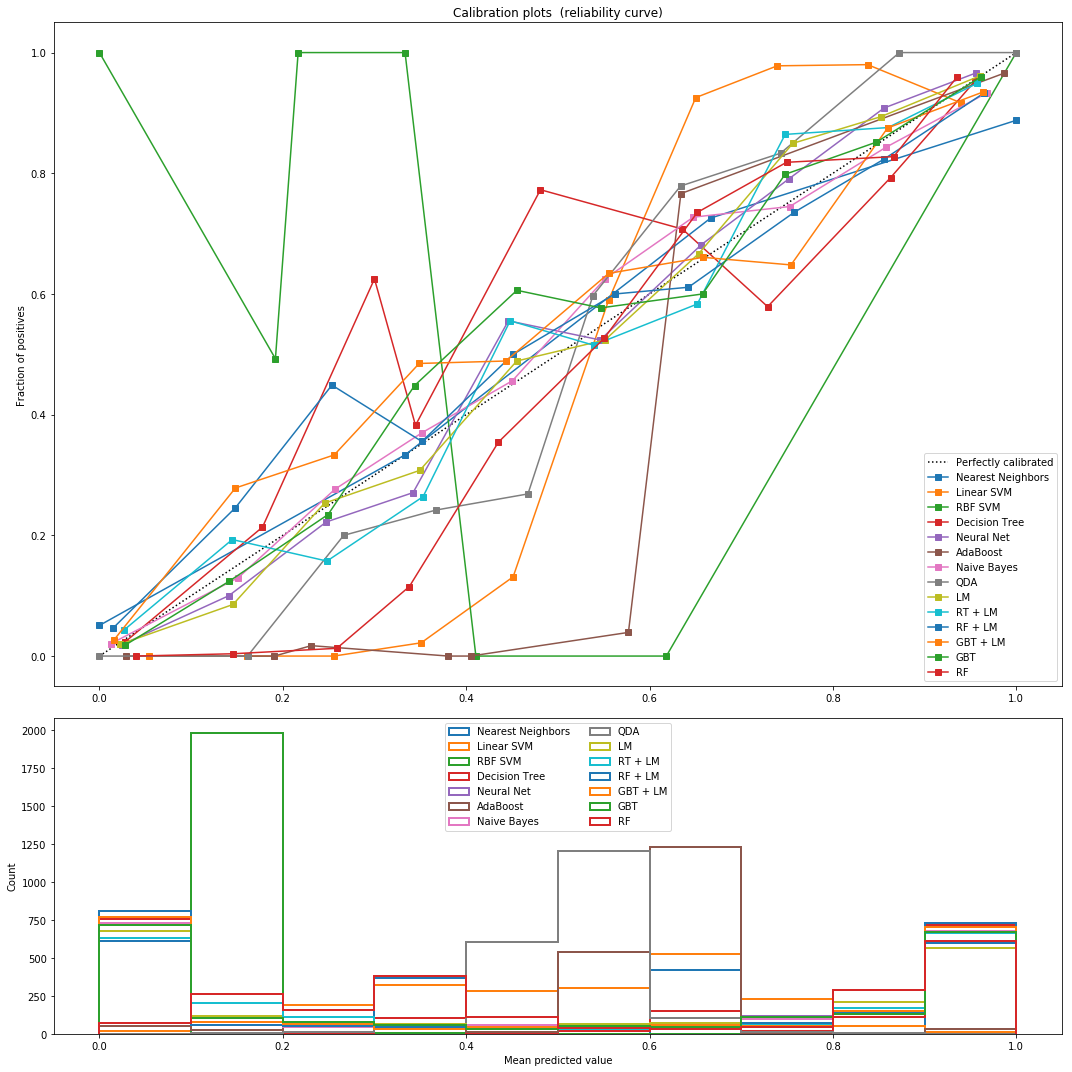

In [6]:
# #############################################################################
# Plot calibration plots
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for prob_pos, name in [[predictEight[n]['prob_pos'],n] for n in names] + [(y_pred_lm,'LM'),
                       (y_pred_rt,'RT + LM'),
                       (y_pred_rf_lm,'RF + LM'),
                       (y_pred_grd_lm,'GBT + LM'),
                       (y_pred_grd,'GBT'),
                       (y_pred_rf,'RF')]:
    
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

## 5、14套模型的重要性输出


In [13]:
# 重要性
print('\n -------- RadomFree importances ------------\n')
print(rf.feature_importances_)
print('\n -------- GradientBoosting importances ------------\n')
print(grd.feature_importances_)
print('\n -------- Logistic Coefficient  ------------\n')
print(lm.coef_ )


# 其他几款模型的特征选择
eight_names = list(predictEight.keys())
[[predictEight[n]['importance'],n] for n in eight_names if predictEight[n]['importance'] != [] ]


 -------- RadomFree importances ------------

[ 0.00550889  0.0013416   0.00946843  0.00315386  0.00159297  0.06351259
  0.00481246  0.00261838  0.00334271  0.00819454  0.00222307  0.07692323
  0.00181319  0.00345627  0.00372946  0.28387983  0.00550478  0.00504261
  0.51273344  0.0011477 ]

 -------- GradientBoosting importances ------------

[ 0.02152663  0.03314941  0.04194018  0.03530701  0.03252671  0.0292791
  0.02210118  0.03490943  0.04569092  0.02321902  0.01988773  0.03633324
  0.03463489  0.03635186  0.02302306  0.0666606   0.02946956  0.02633897
  0.38243275  0.02521775]

 -------- Logistic Coefficient  ------------

[[-0.04287553 -0.036421   -0.04945902  0.13253335  0.02649143 -0.17965617
  -0.00579479 -0.00512973  0.01951769 -0.02659169 -0.06579998 -0.49465367
   0.02783032 -0.09474882 -0.03196817  0.97077326  0.10568118  0.06478186
   2.33393955 -0.05842173]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


[[array([  2.09875561e-03,   0.00000000e+00,   1.25998010e-03,
           0.00000000e+00,   7.28734587e-04,   1.89254296e-02,
           1.31368357e-03,   1.01971475e-03,   3.11957777e-03,
           0.00000000e+00,   0.00000000e+00,   1.24014043e-03,
           2.29969029e-03,   0.00000000e+00,   1.06086399e-03,
           5.01131094e-03,   2.01052164e-03,   9.20372735e-04,
           9.58991224e-01,   0.00000000e+00]), 'Decision Tree'],
 [array([[-0.01216941, -0.00803642, -0.0371962 ,  0.0440979 ,  0.02813782,
          -0.11937585, -0.01560251,  0.00472539,  0.00288186, -0.02019184,
          -0.03446023, -0.3192126 ,  0.01783739, -0.03038167, -0.03201148,
           0.5766335 ,  0.0523026 ,  0.0390042 ,  1.41965647, -0.02905152]]),
  'Linear SVM'],
 [array([ 0.02,  0.06,  0.08,  0.02,  0.  ,  0.04,  0.04,  0.  ,  0.02,
          0.04,  0.  ,  0.1 ,  0.  ,  0.04,  0.  ,  0.18,  0.04,  0.02,
          0.3 ,  0.  ]), 'AdaBoost'],
 [array([[ 0.99215286,  1.00848734,  1.06211506,  1.024

## 6、14套模型的ROC值计算与plot


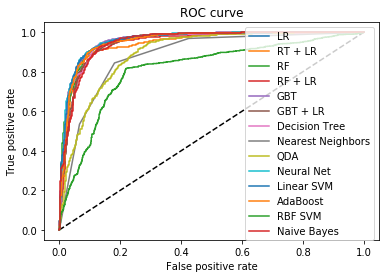

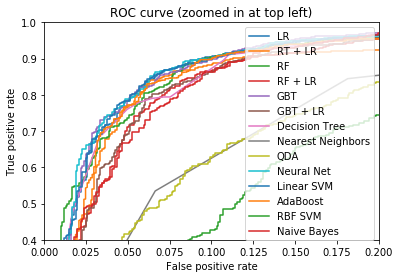

In [16]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lm, tpr_lm, label='LR')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
# 8 款模型
for (fpr,tpr),name in [[predictEight[n]['fpr_tpr'],n] for n in eight_names] :
    plt.plot(fpr, tpr, label=name)
    

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.4, 1)     # ylim改变     # matt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lm, tpr_lm, label='LR')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
for (fpr,tpr),name in [[predictEight[n]['fpr_tpr'],n] for n in eight_names] :
    plt.plot(fpr, tpr, label=name)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## optimize

    借助快照集成，参考：(titu1994/Snapshot-Ensembles)[https://github.com/titu1994/Snapshot-Ensembles]


## 7、加权模型融合数据准备


In [15]:
from MinimiseOptimize import MinimiseOptimize,log_loss_func,calculate_weighted_accuracy

# 集成数据准备
preds_dict = {}
for pred_tmp,name in [[predictEight[n]['prob_pos'],n] for n in names] + [(y_pred_lm,'LM'),
                       (y_pred_rt,'RT + LM'),
                       (y_pred_rf_lm,'RF + LM'),
                       (y_pred_grd_lm,'GBT + LM'),
                       (y_pred_grd,'GBT'),
                       (y_pred_rf,'RF')]:
    preds_dict[name] = np.array([1 - pred_tmp , pred_tmp]).T

# 参数准备
preds = list(preds_dict.values())
models_filenames = list(preds_dict.keys())  # 模型个数
sample_N,nb_classes = preds[0].shape  # 样本数/分类数
testY = y_test.reshape((len(y_test),1))  # 真实Label (2000,1)
testY_cat = np.array([1 - y_test ,y_test]).T # (2000,2)   

## 8、基准优化策略：14套模型融合——平均


In [42]:
# 模型集成：无权重
    # 无权重则代表权重为平均值
prediction_weights = [1. / len(models_filenames)] * len(models_filenames)
calculate_weighted_accuracy(prediction_weights)

Accuracy :  79.7
Recall :  0.7043390514631686


## 9、加权平均优化策略：14套模型融合——加权平均优化

In [40]:
# 模型集成：附权重
best_acc,best_weights = MinimiseOptimize(preds,models_filenames,nb_classes,sample_N,testY,NUM_TESTS = 20)


 ------- Iteration : 1  - acc: 89.9  - rec:0.917255297679112 -------  
    Best Ensemble Weights: 
 [6.01413708e-02 1.67765866e-01 2.18761400e-01 1.37602260e-01
 3.79936007e-08 1.64447752e-15 0.00000000e+00 1.18466862e-01
 6.99878403e-03 1.29796869e-02 2.77283733e-01 6.11475028e-17
 6.82844127e-17 2.23356528e-21]

 ------- Iteration : 2  - acc: 89.4  - rec:0.9031281533804238 -------  
    Best Ensemble Weights: 
 [6.16594671e-01 1.09796545e-16 4.86993420e-17 7.15898170e-04
 7.02153751e-03 4.06538875e-02 2.92130834e-16 5.85976713e-02
 3.25680485e-17 1.04785370e-03 9.85813768e-02 8.48198215e-04
 1.75420590e-01 5.18315324e-04]

 ------- Iteration : 3  - acc: 90.3  - rec:0.9112008072653885 -------  
    Best Ensemble Weights: 
 [1.65963646e-02 8.35407374e-02 1.07596623e-01 2.01735336e-05
 0.00000000e+00 1.79786622e-05 6.15720544e-20 2.59754148e-21
 1.82768751e-01 1.24355235e-03 1.72258605e-01 2.38942641e-04
 4.35718271e-01 7.54761612e-20]

 ------- Iteration : 4  - acc: 89.35  - rec:0.918

In [14]:
# 附权重的最终结果展示
print("Best Accuracy : ", best_acc)
print("Best Weights : ", best_weights)
calculate_weighted_accuracy(best_weights)

Best Accuracy :  90.4
Best Weights :  [1.57919854e-02 2.25437178e-02 1.60078948e-01 1.37993631e-01
 1.60363024e-03 1.91105368e-01 2.34578651e-02 1.24696769e-02
 3.18793907e-03 1.29753377e-02 1.12151337e-01 7.62845967e-04
 3.05643629e-01 2.34089531e-04]
Accuracy :  90.4
Recall :  0.9112008072653885
